In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
%matplotlib inline


import matplotlib.pyplot as plt
# using ggplot style
plt.style.use("ggplot")
# setting width and height of plot
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load the Data
advert = pd.read_csv('future sales.csv')
advert.head()
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


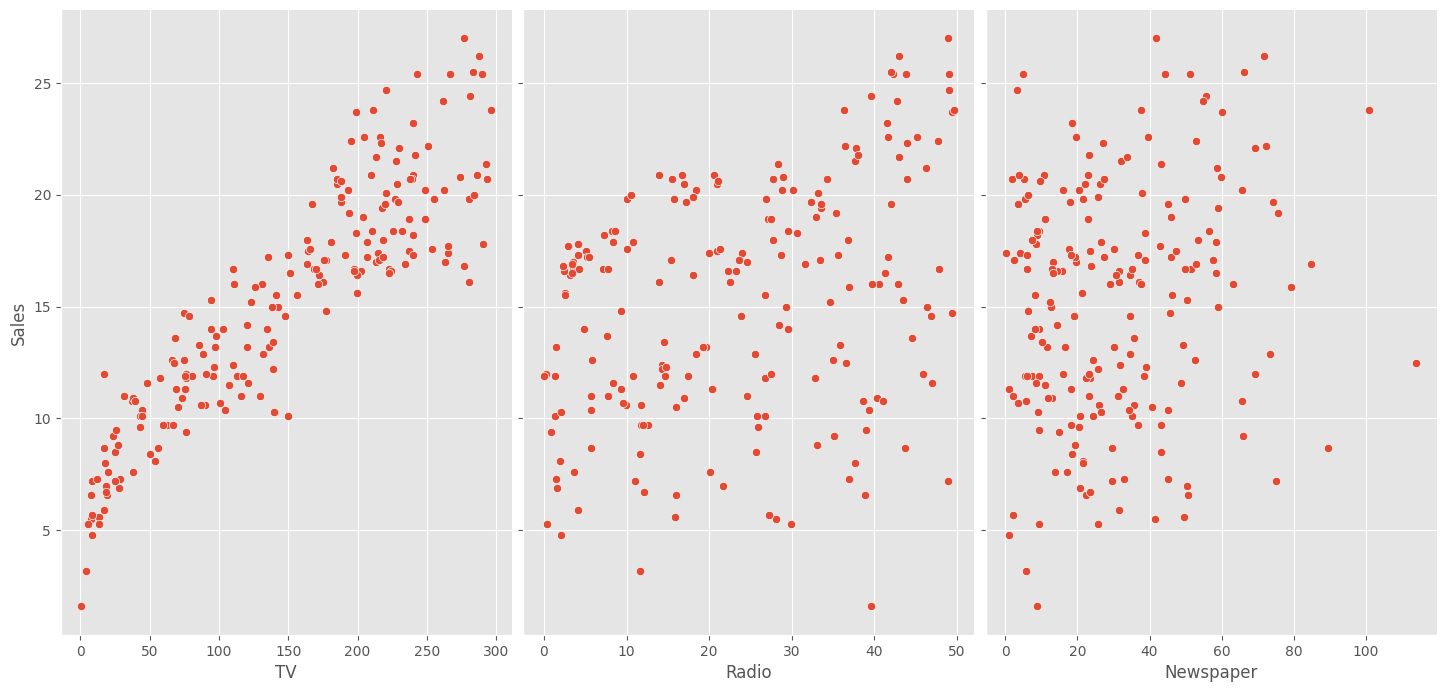

In [9]:
# Checking relationship between Features and Response
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'],
              y_vars=['Sales'],height=7, aspect=0.7)

<Axes: >

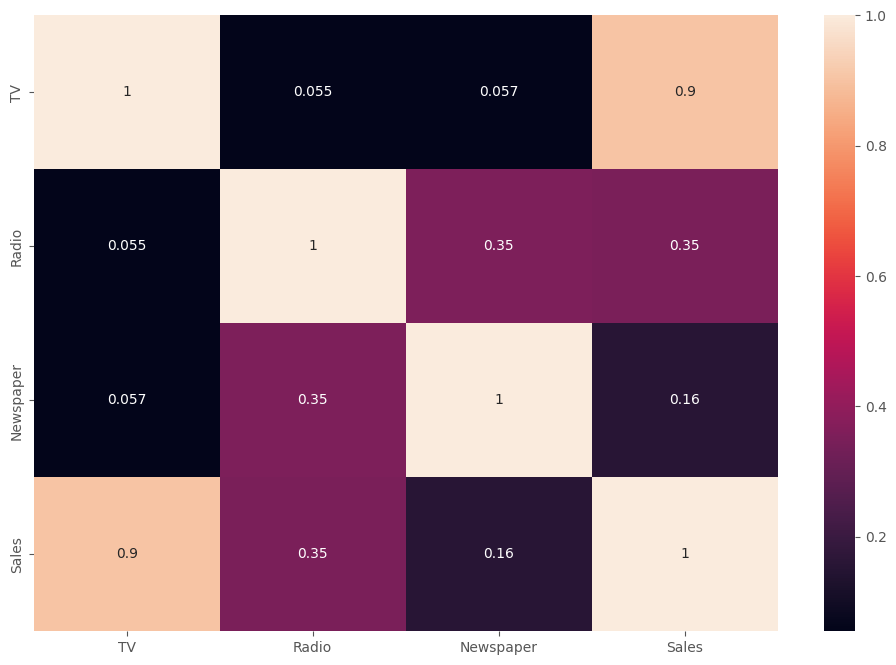

In [10]:
# Viewing the heatmap
sns.heatmap(advert.corr(), annot=True)

In [13]:
# Checking R_squared between 'TV', 'newspaper'
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales

In [14]:
# We are training and evaluating on the entire dataset
lm1 = LinearRegression().fit(X[['TV', 'Newspaper']], y)
lm1_preds = lm1.predict(X[['TV', 'Newspaper']])

print("R^2: ", r2_score(y, lm1_preds))

R^2:  0.8236419280498489


In [15]:
# Checking R_squared between 'TV', 'radio'
lm2 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm2_preds = lm2.predict(X[['TV', 'Radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.9025896186081139


In [16]:
# Checking R_squared between 'TV', 'radio', 'newspaper'
lm3 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'Radio', 'Newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.9025912899684558


In [17]:
# Model Evaluation using Train/Test and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Using all three features
X = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE:  1.5096109295725837
R^2:  0.9048917241361681


In [18]:
# Using just TV and radio features
X = advert[['TV', 'Radio']]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE:  1.509248161866739
R^2:  0.9049374287145224


In [19]:
# Using just TV and newspaper features
X = advert[['TV', 'Newspaper']]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm6 = LinearRegression().fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE:  2.272939941620692
R^2:  0.7843923496624453


In [ ]:
Conclusion
In this guide, we learned how to build a multiple linear regression model with sci-kit learn. We also learned how to do feature selection using R2. Feature Selection helps us to choose the features that will give us a good model. We used R2 to measure the strength of the relationship between our model and the dependent variable.